# 1. Vector Space Model of Word Meaning

The goal of this problem set is to make you familiar with vector space model of word meaning. You may reuse some of functions you coded in Assignment 1. 

### Warning: This assignment may take substantial time to run if you are not optimizing your code. Make sure you have plenty of time to run if you are new to programming.

Go to https://drive.google.com/drive/folders/1Pe6D713L9S0GWwb_XzeLXAeNZOrBqZaN?usp=sharing and click add shortcut to drive. This will add the data required for this problem set to your Google drive.

<img src="https://drive.google.com/uc?id=1LqHisiziX8Ri94Xs6Cv8mhx6vivFM3kS" alt="Drawing" height="300"/>

Caution: Since this is real language on Twitter and deals with current events, some of it could be disturbing. In the later section of the course, we will deal with ethics and what is appropriate and what is not. 



Run the below code snippet. It will generate a URL which generates an authorization code.* Enter it below to give Colab access to your Google drive. 

*Copy function may not work. If so, manually copy the authorization code.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


When you run the `ls` command below, you should see the files in the tweets folder.




In [2]:
!ls "/content/drive/My Drive/tweets"

20000_tweets.jsonl
20000_tweets.txt
covid-tweets-2020-08-10-2020-08-21.tokenized.txt
covid-tweets-2020-08-10-2020-08-21.trigrams.txt
GoogleNews-vectors-negative300.bin.gz
stop_words.txt


In [3]:
# let's read tweets. These tweets are already tokenized and cleaned (Assignment 1)
tweets = open("/content/drive/My Drive/tweets/covid-tweets-2020-08-10-2020-08-21.tokenized.txt", "r").read().split("\n")
tweets = [tweet.split() for tweet in tweets]

print(f'len(tweets): {len(tweets)}')
print()

for i in range(5):
    print(f'tweet {i+1}: {tweets[i]}')

len(tweets): 312878

tweet 1: ['covid-19', 'economic', 'response', 'cancel', 'student', 'loans', 'by', 'executive', 'order', 'sign', 'the', 'petition', 'URL', 'via', '@USER']
tweet 2: ['hey', 'the', 'stock', 'markets', 'up', 'fuck', 'trump', 'and', 'the', 'trumpublican', 'senate', 'URL']
tweet 3: ['@USER', 'blame', 'trump', 'for', 'no', 'sports', 'because', 'of', 'covid19', '@USER']
tweet 4: ['do', 'u', 'guys', 'think', 'that', 'reopening', 'of', 'the', 'dinning', 'in', 'the', 'restaurants', 'of', 'lahore', 'will', 'bring', 'any', 'change', 'in', 'our', 'lives', 'nothing', 'is', 'going', 'to', 'change', 'i', 'think', 'cause', 'many', 'people', 'have', 'learned', 'cooking', 'painting', 'and', 'many', 'new', 'stuff', 'during', 'lockdown', 'and', 'i', 'think', 'we', 'all', 'will', 'continue', 'those', 'things', '1/2']
tweet 5: ['@USER', 'ya', 'just', 'knew', 'the', 'season', 'would', 'n’t', 'go', 'by', 'without', 'some', 'bench', 'clearing', 'brawls', 'covid', 'or', 'not', 'behaviors', 'c

## Problem 1.1: Word space model

Compute the most important context words of `ventilator`. Use Pointwise Mutual Information (PMI) to rank the context words (Refer to Lecture 4).

We define context as up to 3 words to the left and 3 words to the right. Ignore stop words and words that do not start with [a-z#]. Also ignore words that are not in the top 1000 frequent words.

These context words define the dimensions of the vector space model. Represent each word as a vector (dictionary/counter) of context words with PMI as the importance of the context word. Print the top 20 context words for each.

This is the sample output I got for `ventilator`. Your numbers need not match mine but the ranked list should look close to what I have.

```
[('put', 18.280538283196606), ('wearing', 17.587373569812726), ('even', 17.58651933524197), ('like', 17.402738298715878), ('covid', 17.172590097063086), ('patients', 16.894419647496004), ('use', 16.894298589380956), ('die', 16.89426559608771), ('days', 16.89415252713107), ('needed', 16.489137134110106), ('month', 16.48907033839664), ('weeks', 16.488913820220848), ('away', 16.48879303327717), ('week', 16.488739054051933), ('person', 16.488678720881293), ('good', 16.488160838026904), ('deaths', 16.487822204799755), ('go', 16.487564042558112), ('would', 16.48707075078768), ('one', 16.48706217686235), ('get', 16.486565870239033)]
```



Let's first load stop words.

In [4]:
stop_words = set()
def load_stop_words():
  words = open("/content/drive/My Drive/tweets/stop_words.txt", "r").read().split("\n")
  for word in words:
    stop_words.add(word.strip())

load_stop_words()
print(f'len(stop_words): {len(stop_words)}')
print()
print(f'stop_words: {stop_words}')

len(stop_words): 134

stop_words: {'before', 'down', 't', 'than', 'then', 'most', 'do', 'ourselves', 'their', 'all', 'both', 'him', 'from', 'over', 'at', 'the', 's', 'her', 'them', 'had', 'here', 'being', 'because', 'am', 'where', 'to', 'myself', 'just', 'and', 'been', 'not', 'there', 'having', 'for', 'don', 'more', 'who', 'his', 'but', 'in', 'that', 'our', 'can', 'he', 'hers', 'my', 'was', 'with', 'she', 'your', 'during', 'other', 'above', 'be', 'will', '@USER', 'of', 'or', 'how', 'those', 'no', 'while', 'against', 'such', 'herself', 'once', 'by', 'doing', 'themselves', 'are', "'ld", 'we', 'on', 'you', 'URL', 'out', 'what', "'ll", 'off', 'yourself', "n't", 'nor', 'itself', 'it', 'these', 'is', 'few', "'ve", 'yourselves', 'if', 'have', 'about', 'so', 'as', 'further', 'same', 'were', 'should', 'after', 'too', 'they', 'an', 'theirs', 'i', 'ours', 'any', 'until', 'a', 'under', 'yours', 'its', 'amp', 'own', 'into', 'did', 'why', 'has', 'when', 'himself', 'which', 'below', 'very', 'now', 't

Ignore stop words and words that do not start with [a-z#]. 

In [5]:
def ignore_words(tweets, stop_words):
    ignored_words = []
    starts_with = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '#']

    for tweet in tweets:
        new_tweet = []
        for word in tweet:
            if (word not in stop_words) and (word[0] in starts_with):
                new_tweet.append(word)
        ignored_words.append(new_tweet)

    return ignored_words

def store_individual_freq(tweets):
    individual_freq = {}

    for tweet in tweets:
        for word in tweet:
            if word in individual_freq:
                individual_freq[word] += 1
            else:
                individual_freq[word] = 1

    return individual_freq

ignored_words = ignore_words(tweets, stop_words)

# constant variable: og_tweets = original tweets
# constant variable: tweets = tweets without stop words or words that do not start with [a-z#]
og_tweets = tweets
tweets = ignored_words

# constant variable: individual_freq = dictionary of {word: frequency}
individual_freq = store_individual_freq(tweets)

for i in range(5):
    print(f'tweet {i+1}: {tweets[i]}')

print()
print(f'number of unique words in tweets: {len(individual_freq)}')

tweet 1: ['covid-19', 'economic', 'response', 'cancel', 'student', 'loans', 'executive', 'order', 'sign', 'petition', 'via']
tweet 2: ['hey', 'stock', 'markets', 'fuck', 'trump', 'trumpublican', 'senate']
tweet 3: ['blame', 'trump', 'sports', 'covid19']
tweet 4: ['u', 'guys', 'think', 'reopening', 'dinning', 'restaurants', 'lahore', 'bring', 'change', 'lives', 'nothing', 'going', 'change', 'think', 'cause', 'many', 'people', 'learned', 'cooking', 'painting', 'many', 'new', 'stuff', 'lockdown', 'think', 'continue', 'things']
tweet 5: ['ya', 'knew', 'season', 'would', 'n’t', 'go', 'without', 'bench', 'clearing', 'brawls', 'covid', 'behaviors', 'ca', 'n’t', 'changed', 'rules', 'sadly']

number of unique words in tweets: 139651


Also ignore words that are not in the top 1000 frequent words.

In [6]:
def store_top_1000_freq(individual_freq):
    top_1000_freq = {}

    sorted_values = sorted(individual_freq.values())
    top_1000_values = sorted_values[-1000:]

    count = 0
    lowest_freq = top_1000_values[0]
    num_lowest_freq = 1

    # count the number of words with the lowest frequency value
    for value in top_1000_values[1:]:
        if value == lowest_freq:
            num_lowest_freq += 1
        else:
            break

    for word in individual_freq:
        if individual_freq[word] in top_1000_values:
            # word frequency value is in the top 1000 values and is not the lowest frequency value
            if individual_freq[word] != lowest_freq:
                top_1000_freq[word] = individual_freq[word]

            # word frequency value is in the top 1000 values and is the lowest frequency value
            # ensure that you include the correct number of words with the lowest frequency value
            elif count < num_lowest_freq:
                top_1000_freq[word] = individual_freq[word]
                count += 1

    return top_1000_freq

# constant variable: top_1000_freq = dictionary of {word: frequency}
top_1000_freq = store_top_1000_freq(individual_freq)

print(f'len(top_1000_freq): {len(top_1000_freq)}')
print()
print(f'top_1000_freq: {top_1000_freq}')

len(top_1000_freq): 1000

top_1000_freq: {'covid-19': 33591, 'economic': 1718, 'response': 3927, 'student': 1193, 'order': 1756, 'sign': 1590, 'via': 6747, 'hey': 1809, 'stock': 745, 'fuck': 3402, 'trump': 19223, 'senate': 783, 'blame': 1890, 'sports': 1412, 'covid19': 4958, 'u': 3595, 'guys': 1549, 'think': 9817, 'reopening': 766, 'bring': 1294, 'change': 2007, 'lives': 3571, 'nothing': 4149, 'going': 11860, 'cause': 2648, 'many': 8780, 'people': 31850, 'new': 15986, 'stuff': 1207, 'lockdown': 11082, 'continue': 1700, 'things': 4060, 'ya': 950, 'knew': 1143, 'season': 2580, 'would': 16332, 'n’t': 31053, 'go': 12764, 'without': 3714, 'covid': 71281, 'ca': 9962, 'changed': 747, 'rules': 1357, 'lot': 3385, 'thank': 3235, 'absolutely': 1321, 'money': 4743, 'run': 1626, 'democrat': 846, 'cities': 821, 'cases': 14420, 'death': 6078, 'recovered': 2175, 'critical': 847, 'population': 1833, '#coronavirus': 5073, '#covid19': 14235, 'zealand': 1296, 'day': 8261, 'today': 6491, 'society': 699, 'w

Store frequencies of (word, context word) pairs.

In [7]:
# context words are the closest 1-3 words, within the top 1000 words, that come before or after the target word
def get_context(index, tweet, top_1000_freq):
    context_words = []

    left_index = index-1
    left_count = 0

    right_index = index+1
    right_count = 0

    while left_index >= 0 and left_count < 3:
        if tweet[left_index] in top_1000_freq:
            context_words.append(tweet[left_index])
            left_count += 1

        left_index -= 1

    while right_index < len(tweet) and right_count < 3:
        if tweet[right_index] in top_1000_freq:
            context_words.append(tweet[right_index])
            right_count += 1

        right_index += 1

    return context_words

def store_pair_freq(word1, top_1000_freq):
    pair_freq = {}

    for word in top_1000_freq:
        pair_freq[word] = 0

    for tweet in tweets:
        if word1 in tweet:
            indices = [i for i, x in enumerate(tweet) if x == word1]

            for index in indices:
                context_words = get_context(index, tweet, top_1000_freq)
                for context_word in context_words:
                    pair_freq[context_word] += 1

    return pair_freq

ventilator_pair_freq = store_pair_freq('ventilator', top_1000_freq)
print(f'len(ventilator_pair_freq): {len(ventilator_pair_freq)}')
print()
print(f'ventilator_pair_freq: {ventilator_pair_freq}')

len(ventilator_pair_freq): 1000

ventilator_pair_freq: {'covid-19': 21, 'economic': 0, 'response': 2, 'student': 1, 'order': 1, 'sign': 0, 'via': 2, 'hey': 0, 'stock': 0, 'fuck': 0, 'trump': 1, 'senate': 0, 'blame': 0, 'sports': 0, 'covid19': 0, 'u': 3, 'guys': 0, 'think': 1, 'reopening': 0, 'bring': 1, 'change': 0, 'lives': 1, 'nothing': 1, 'going': 1, 'cause': 0, 'many': 6, 'people': 4, 'new': 2, 'stuff': 0, 'lockdown': 0, 'continue': 0, 'things': 1, 'ya': 0, 'knew': 0, 'season': 0, 'would': 6, 'n’t': 15, 'go': 4, 'without': 0, 'covid': 30, 'ca': 0, 'changed': 0, 'rules': 0, 'lot': 1, 'thank': 1, 'absolutely': 0, 'money': 1, 'run': 0, 'democrat': 0, 'cities': 0, 'cases': 5, 'death': 2, 'recovered': 0, 'critical': 2, 'population': 0, '#coronavirus': 0, '#covid19': 0, 'zealand': 0, 'day': 2, 'today': 3, 'society': 0, 'works': 1, 'together': 0, 'common': 0, 'good': 4, 'actual': 0, 'looks': 0, 'like': 12, 'time': 3, 'students': 0, 'teachers': 0, 'already': 1, 'coming': 0, 'home': 4, 'inf

Let's build the word vectors

In [8]:
import math

In [9]:
# word total, not including stopwords or words that do not start with [a-z#]
# includes words that are not in the top 1000 frequency list
def count_word_total():
    word_total = 0
    for tweet in tweets:
        word_total += len(tweet)

    return word_total

def PMI(word1_freq, word2_freq, word1_word2_freq, n):
    # You have to store frequencies of individual words and (word, context word) 
    # pairs to compute this. You can compute them beforehand in order to avoid 
    # counting every time when this function is called.

    # Write your code
    x = (word1_word2_freq*n)/(word1_freq*word2_freq)
    if x != 0:
        pmi_value = math.log(x)
    else:
        pmi_value = 0

    return pmi_value

# needs individual_freq and word_total
def build_word_vector(word1, pair_freq):
    # Write your code
    word_vector = {}

    word1_freq = individual_freq[word1]

    for word2 in pair_freq:
        word2_freq = individual_freq[word2]
        word1_word2_freq = pair_freq[word2]

        pmi_value = PMI(word1_freq, word2_freq, word1_word2_freq, word_total)
        word_vector[word2] = pmi_value

    return word_vector

# sort word vector by PMI value
# return sorted list of (word, PMI) pairs
def sort_word_vector(word_vector):
    sorted_word_vector = {k: v for k, v in sorted(word_vector.items(), key=lambda item: item[1])}
    sorted_list = []
    for k, v in sorted_word_vector.items():
        sorted_list.append((k, v))

    return sorted_list

def print_top_dimensions(word_vector, n):
    # print top n dimensions sorted in the order of importance
    sorted_list = sort_word_vector(word_vector)
    i = len(sorted_list)-1

    while n > 0:
        print(sorted_list[i])
        i -= 1
        n -= 1

# constant variable: word_total = N for PMI equation
word_total = count_word_total()

v1 = build_word_vector('ventilator', ventilator_pair_freq)
print_top_dimensions(v1, 20) # print top 20 dimensions along with their weights

('patient', 5.566000919612041)
('hospital', 4.943994839077336)
('patients', 4.754752839438807)
('put', 4.591270340211511)
('brain', 4.567622691910836)
('spent', 4.318976847785691)
('blood', 4.30327345585724)
('enjoy', 4.282249556065533)
('tried', 4.268475233600704)
('loved', 4.217797723844838)
('end', 4.202171285881991)
('nearly', 4.152365583898054)
('days', 4.126892766336076)
('critical', 4.121187998698428)
('increase', 4.100737388227137)
('needed', 4.042872328676352)
('month', 4.028779954536644)
('experience', 4.00853419109546)
('yesterday', 4.005374630805092)
('weeks', 3.9578036429242243)


In [10]:
print(f'word_total: {word_total}')
print()
print(f'word vector for ventilator: {v1}')

word_total: 4045706

word vector for ventilator: {'covid-19': 2.7922504975856532, 'economic': 0, 'response': 2.587257638772473, 'student': 3.085515090692621, 'order': 2.698947738595475, 'sign': 0, 'via': 2.046035452723057, 'hey': 0, 'stock': 0, 'fuck': 0, 'trump': 0.3058787550376768, 'senate': 0, 'blame': 0, 'sports': 0, 'covid19': 0, 'u': 3.0810545313035, 'guys': 0, 'think': 0.9778706570980157, 'reopening': 0, 'bring': 3.0042480377296914, 'change': 0, 'lives': 1.9891405651960887, 'nothing': 1.8391188924576694, 'going': 0.7888148402388205, 'cause': 0, 'many': 2.88126929538943, 'people': 1.1872432129101183, 'new': 1.183420075164518, 'stuff': 0, 'lockdown': 0, 'continue': 0, 'things': 1.8608032601947588, 'ya': 0, 'knew': 0, 'season': 0, 'would': 2.260619329579126, 'n’t': 2.5343410128408874, 'go': 2.1016518865122937, 'without': 0, 'covid': 2.396553803225714, 'ca': 0, 'changed': 0, 'rules': 0, 'lot': 2.042632327444162, 'thank': 2.0879573058555363, 'absolutely': 0, 'money': 1.70531638691295

## Problem 1.2: Compute the word similarity between words using Cosine Similarity.

Compute cosine similarity between the following pair of words: 
```
('ventilator', 'covid-19')
('ventilator', 'lockdown')
('ventilator', 'mask')
('ventilator', 'ppe')
```

Outputs of my code are:
```
('ventilator', 'covid-19') 0.17076006036635358
('ventilator', 'lockdown') ...
('ventilator', 'mask') 0.19229601085517933
('ventilator', 'ppe') ...
```


In [11]:
import numpy as np

In [12]:
# convert word_vector dictionary to np.array 
def to_numpy_array(d):
    d_values = list(d.values())
    d_array = np.array(d_values)
    return d_array

# input: word_vector for word1 and word_vector for word2
def cosine_similarity(vector1, vector2):
    # write your code
    v1_array = to_numpy_array(vector1)
    v2_array = to_numpy_array(vector2)

    cos_sim = (np.dot(v1_array, v2_array))/(np.linalg.norm(v1_array)*np.linalg.norm(v2_array))
    
    return cos_sim

ventilator_pair_freq = store_pair_freq('ventilator', top_1000_freq)
covid19_pair_freq = store_pair_freq('covid-19', top_1000_freq)
lockdown_pair_freq = store_pair_freq('lockdown', top_1000_freq)
mask_pair_freq = store_pair_freq('mask', top_1000_freq)
ppe_pair_freq = store_pair_freq('ppe', top_1000_freq)

ventilator = build_word_vector('ventilator', ventilator_pair_freq)
covid19 = build_word_vector('covid-19', covid19_pair_freq)
lockdown = build_word_vector('lockdown', lockdown_pair_freq)
mask = build_word_vector('mask', mask_pair_freq)
ppe = build_word_vector('ppe', ppe_pair_freq)

print("('ventilator', 'covid-19') is", cosine_similarity(ventilator, covid19))
print("('ventilator', 'lockdown') is", cosine_similarity(ventilator, lockdown))
print("('ventilator', 'mask') is", cosine_similarity(ventilator, mask))
print("('ventilator', 'ppe') is", cosine_similarity(ventilator, ppe))

('ventilator', 'covid-19') is 0.5144748736474374
('ventilator', 'lockdown') is 0.49838268423692966
('ventilator', 'mask') is 0.46080412510653584
('ventilator', 'ppe') is 0.4465612497957502


## Problem 1.3: What can you tell about these words from the similarities?

Two vectors with the same orientation have a cosine similarity of 1 (https://en.wikipedia.org/wiki/Cosine_similarity).

1. `ventilator` when compared with `covid-19, lockdown, mask, ppe`

`ventilator` and `covid-19, lockdown, mask, ppe` all have cosine similarity values around 0.5.  This means that they are all relatively similar to `ventilator`.  This makes sense because a tweet discussing ventilators is likely to mention covid-19, lockdowns, masks, and ppe as well.

2. `pandemic` when compared with `covid-19, lockdown, mask, ppe`

`pandemic` and `covid-19, ppe` have cosine similarity values around 0.8 while `pandemic` and `lockdown, mask` have cosine similarity values around 0.9.  This means that they are all more similar to `pandemic` than `ventilator`.  It also means that `lockdown, mask` are more similar to `pandemic` than `covid-19, ppe`.

3. `president` compared with `trump, biden`

`president` and `trump, biden` have cosine similarity values around 0.9.  This means that they are both very similar to `president`.  Since `president` and `trump` has a higher cosine similarity value than `president` and `biden`, `president` and `trump` are more similar to each other.  This makes sense because the corpus contains tweets from 2020, when Trump was still the president (although Biden was elected in the 2020 election, he was not sworn into office until January 2021).

4. `trudeau` compared with `trump, biden`

`trudeau` and `trump, biden` have cosine similarity values around 0.6.  This means that they are both less similar to `trudeau` than `president` but are still relatively similar to `trudeau`.  Since `trudeau` and `trump` has a higher cosine similarity value than `trudeau` and `biden`, `trudeau` and `trump` are more similar to each other.  It makes sense that `trump, biden` are more similar to `president` since they are the 45th President and 46th President of the United States while Trudeau is the Prime Minister of Canada.

In [13]:
# 1
pandemic_pair_freq = store_pair_freq('pandemic', top_1000_freq)
pandemic = build_word_vector('pandemic', pandemic_pair_freq)

print("('pandemic', 'covid-19') is", cosine_similarity(pandemic, covid19))
print("('pandemic', 'lockdown') is", cosine_similarity(pandemic, lockdown))
print("('pandemic', 'mask') is", cosine_similarity(pandemic, mask))
print("('pandemic', 'ppe') is", cosine_similarity(pandemic, ppe))

president_pair_freq = store_pair_freq('president', top_1000_freq)
trudeau_pair_freq = store_pair_freq('trudeau', top_1000_freq)
trump_pair_freq = store_pair_freq('trump', top_1000_freq)
biden_pair_freq = store_pair_freq('biden', top_1000_freq)

president = build_word_vector('president', president_pair_freq)
trudeau = build_word_vector('trudeau', trudeau_pair_freq)
trump = build_word_vector('trump', trump_pair_freq)
biden = build_word_vector('biden', biden_pair_freq)

print()
print("('president', 'trump') is", cosine_similarity(president, trump))
print("('president', 'biden') is", cosine_similarity(president, biden))

print()
print("('trudeau', 'trump') is", cosine_similarity(trudeau, trump))
print("('trudeau', 'biden') is", cosine_similarity(trudeau, biden))

('pandemic', 'covid-19') is 0.9057999886493393
('pandemic', 'lockdown') is 0.9194963696576852
('pandemic', 'mask') is 0.8416327111804794
('pandemic', 'ppe') is 0.7638638294408593

('president', 'trump') is 0.9550931235337119
('president', 'biden') is 0.8989870908815087

('trudeau', 'trump') is 0.6251622261266402
('trudeau', 'biden') is 0.6046747645935275


# Let's play with word2vec

First let's load word2vec. I am using [gensim](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html) but feel free to use any libraries or tools.

In [1]:
from gensim.models import KeyedVectors

EMBEDDING_FILE = '/content/drive/My Drive/tweets/GoogleNews-vectors-negative300.bin.gz' # from above
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

## Problem 1.4: Compute the top 5 similar words of `ventilator` using word2vec?

In [2]:
# Write your code here
top_5_similar = word2vec.most_similar(positive=['ventilator'], topn=5)
print(top_5_similar)

[('respirator', 0.7864563465118408), ('mechanical_ventilator', 0.7063840627670288), ('intensive_care', 0.6809945702552795), ('ventilators', 0.6683582067489624), ('breathing_tube', 0.6665509343147278)]


# Problem 1.5: Word analogy

If I told you the plural of `car` is `cars`, can you automatically find the plural of `hypothesis` and `man` using word2vec.

Similarly, if I told you a newborn `dog` is called `puppy`, can you automatically find what are the newborn words of `cat` and `sheep` using word2vec?


In [3]:
# Write your code here
plural_hypothesis = word2vec.most_similar(positive=['cars', 'hypothesis'], negative=['car'], topn=1)
print(plural_hypothesis)

plural_man = word2vec.most_similar(positive=['cars', 'man'], negative=['car'], topn=1)
print(plural_man)

newborn_cat = word2vec.most_similar(positive=['puppy', 'cat'], negative=['dog'], topn=1)
print(newborn_cat)

newborn_sheep = word2vec.most_similar(positive=['puppy', 'sheep'], negative=['dog'], topn=1)
print(newborn_sheep)

[('hypotheses', 0.6453900337219238)]
[('men', 0.5470781326293945)]
[('kitten', 0.7634989619255066)]
[('lambs', 0.7109252214431763)]


# 2. Topic Models 

The goal of this part is to make you familiar with topic models. You may reuse some of functions you coded for the previous assignments.

## Data Download and Setup

Let us start by downloading the news section of the Brown corpus:

In [14]:
import nltk
nltk.download('brown')
from nltk.corpus import brown
documents = [brown.words(fileid) for fileid in brown.fileids()]

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Let us inspect some of the documents:

In [15]:
print("The news section of the Brown corpus contains {} documents.".format(len(documents)))
for i in range(3):
  document = documents[i]
  print("Document {} has {} words: {}".format(i, len(document), document))

The news section of the Brown corpus contains 500 documents.
Document 0 has 2242 words: ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]
Document 1 has 2277 words: ['Austin', ',', 'Texas', '--', 'Committee', 'approval', ...]
Document 2 has 2275 words: ['Several', 'defendants', 'in', 'the', 'Summerdale', ...]


Finally, let us download a list of stopwords for later.

In [16]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
print(stopwords_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

## Problem 2.1: Document-Term Matrix

Create a document-term matrix with tf-idf. You should preprocess documents by: 1) lowercasing words, 2) excluding stopwords, and 3) including alphanumeric strings only.

In [17]:
import numpy as np
import copy
from typing import List

In [18]:
# input: document of type <class 'nltk.corpus.reader.tagged.TaggedCorpusView'>
def clean_document(document):
    clean_document = []

    # convert document to list 
    for word in document:
        clean_document.append(word)

    to_remove = []

    for word in document:
        # remove stopwords
        if word.lower() in stopwords_list:
            to_remove.append(word)
    
        # remove words that are not alphanumeric strings
        elif (not word.isalnum()):
            to_remove.append(word)

    for r in to_remove:
        clean_document.remove(r)

    # lowercase words
    lower_document = [x.lower() for x in clean_document]

    return lower_document

# constant variable: cleaned documents = List[List[str]]
cleaned_documents = []

for document in documents:
    cleaned_document = clean_document(document)
    cleaned_documents.append(cleaned_document)

print(f'cleaned document 1: {cleaned_documents[0]}')

cleaned document 1: ['fulton', 'county', 'grand', 'jury', 'said', 'friday', 'investigation', 'recent', 'primary', 'election', 'produced', 'evidence', 'irregularities', 'took', 'place', 'jury', 'said', 'presentments', 'city', 'executive', 'committee', 'charge', 'election', 'deserves', 'praise', 'thanks', 'city', 'atlanta', 'manner', 'election', 'conducted', 'term', 'jury', 'charged', 'fulton', 'superior', 'court', 'judge', 'durwood', 'pye', 'investigate', 'reports', 'possible', 'irregularities', 'primary', 'ivan', 'allen', 'relative', 'handful', 'reports', 'received', 'jury', 'said', 'considering', 'widespread', 'interest', 'election', 'number', 'voters', 'size', 'city', 'jury', 'said', 'find', 'many', 'registration', 'election', 'laws', 'outmoded', 'inadequate', 'often', 'ambiguous', 'recommended', 'fulton', 'legislators', 'act', 'laws', 'studied', 'revised', 'end', 'modernizing', 'improving', 'grand', 'jury', 'commented', 'number', 'topics', 'among', 'atlanta', 'fulton', 'county', 'pu

In [19]:
def create_tfidf_matrix(documents: List[List[str]]) -> (np.array, List[str]):
    # Args:
    #   documents: list of cleaned documents, each document being a list of words.
    # Outputs:
    #   tfidf_matrix: np.array of shape (num_documents, vocabulary_size)
    #   vocabulary: a list of terms corresponding to the columns of the matrix.

    num_documents = len(documents)

    vocabulary = []

    # build vocabulary list
    for document in documents:
        for word in document:
            if word not in vocabulary:
                vocabulary.append(word)

    doc_num = 0
    # tf(t, d) = (# of times t occurs in d) / (total # of words in d)
    tf_matrix = np.zeros((num_documents,len(vocabulary)))
    for document in documents:
        for word in document:
            i = vocabulary.index(word)
            tf_matrix[doc_num,i] += 1

        num_words_in_d = len(document)

        if num_words_in_d != 0:
            tf_matrix[doc_num] = tf_matrix[doc_num]/num_words_in_d

        doc_num += 1

    # idf(t) = log((total # of documents) / (# of d where t appears))
    num_d_with_t = np.count_nonzero(tf_matrix, axis=0)
    x = num_documents/num_d_with_t
    idf_array = np.log(x)

    tfidf_matrix = tf_matrix*idf_array

    return tfidf_matrix, vocabulary, idf_array

# constant variable: tfidf_matrix = np.array of shape (num_documents, vocabulary_size)
# constant variable: vocabulary = List[str] of vocabulary words
# constant variable: idf_array = np.array of shape (vocabulary_size,)
tfidf_matrix, vocabulary, idf_array = create_tfidf_matrix(cleaned_documents)

print(f'tfidf_matrix.shape: {tfidf_matrix.shape}')
print(f'vocabulary: {vocabulary}')
print(f'len(vocabulary): {len(vocabulary)}')
print(f'idf_array.shape: {idf_array.shape}')

tfidf_matrix.shape: (500, 40881)
vocabulary: ['fulton', 'county', 'grand', 'jury', 'said', 'friday', 'investigation', 'recent', 'primary', 'election', 'produced', 'evidence', 'irregularities', 'took', 'place', 'presentments', 'city', 'executive', 'committee', 'charge', 'deserves', 'praise', 'thanks', 'atlanta', 'manner', 'conducted', 'term', 'charged', 'superior', 'court', 'judge', 'durwood', 'pye', 'investigate', 'reports', 'possible', 'ivan', 'allen', 'relative', 'handful', 'received', 'considering', 'widespread', 'interest', 'number', 'voters', 'size', 'find', 'many', 'registration', 'laws', 'outmoded', 'inadequate', 'often', 'ambiguous', 'recommended', 'legislators', 'act', 'studied', 'revised', 'end', 'modernizing', 'improving', 'commented', 'topics', 'among', 'purchasing', 'departments', 'well', 'operated', 'follow', 'generally', 'accepted', 'practices', 'inure', 'best', 'governments', 'merger', 'proposed', 'however', 'believes', 'two', 'offices', 'combined', 'achieve', 'greater'

How sparse is this matrix? Calculate the ratio between cells with value 0 and the total number of cells. 

In [20]:
nonzero_cells = np.count_nonzero(tfidf_matrix)
total_cells = tfidf_matrix.shape[0]*tfidf_matrix.shape[1]
sparsity = nonzero_cells/total_cells
print(f'ratio between cells with value 0 and the total number of cells: {sparsity}')

ratio between cells with value 0 and the total number of cells: 0.015473300555270174


## Problem 2.2: Latent Semantic Analysis

We perform LSA to obtain document embeddings `U` and term embeddings `VT`.

In [21]:
from typing import Dict

In [22]:
from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(tfidf_matrix, 
                              n_components=10,
                              n_iter=100,
                              random_state=42)

# constant variable: U = np.array of shape (num_documents, n_components)
# constant variable: Sigma = np.array of shape (n_components,)
# constant variable: VT = np.array of shape (n_components, vocabulary_size)

In [23]:
print(f'U.shape = {U.shape}')
print(f'Sigma.shape = {Sigma.shape}')
print(f'VT.shape = {VT.shape}')

U.shape = (500, 10)
Sigma.shape = (10,)
VT.shape = (10, 40881)


Define a function to find the 5 most relevant terms for each of the 10 latent dimensions (tip: you should make use of VT and the vocabulary).

In [24]:
def extract_salient_words(VT: np.array, vocabulary: List[str]) -> Dict[int, List[str]]:
    # Args:
    #  VT: a numpy array of size (n_components, vocabulary_size)
    #  vocabulary: a list of words of size vocabulary_size
    # Outputs:
    #  salient_words: a dictionary with the latent dimension indices as keys and a list of its 5 most salient words as values

    salient_words = {}

    # loop through rows of VT
    for row_index in range(VT.shape[0]):
        row = VT[row_index]
        i = np.argpartition(row, -5)[-5:]
        indices = i[np.argsort((-row)[i])]

        top_5_salient = []
        for index in indices:
            top_5_salient.append(vocabulary[index])

        salient_words[row_index] = top_5_salient

    return salient_words

salient_words = extract_salient_words(VT, vocabulary)

for key, value in salient_words.items():
    print("Concept {}: {}".format(str(key), " ".join(value)))

Concept 0: af polynomial operator theorem q
Concept 1: af polynomial operator theorem diagonalizable
Concept 2: anode holder arc temperature plug
Concept 3: anode phil mike deegan jess
Concept 4: staining nonspecific clover sections wtv
Concept 5: dictionary text cell platform information
Concept 6: platform gyro accelerometer leveling axis
Concept 7: q tangent secants c curve
Concept 8: feed phil milligrams cattle grams
Concept 9: phil mike deegan eddie anniston


## Problem 2.3: Document Retrieval

Given a text query, view this as a mini document, and compare it to your documents in the low-dimensional space.

First, we need to create a vector $\mathbf{d}$, which is the tf-idf representation of the query. Then we project it into the semantic space with the linear map $\Sigma^{-1} V^\top$ learned above. This gives us a pseudo-document embedding $\hat{\mathbf{d}}$.

$$\hat{\mathbf{d}} = \Sigma^{-1} V^\top \mathbf{d}$$

In [25]:
# only include words that are in the vocabulary
def clean_query(query, vocabulary):
    cleaned_query = []

    for word in query:
        if word.lower() in vocabulary:
            cleaned_query.append(word.lower())

        # separate words with hyphen
        elif '-' in word.lower():
            hyphen_list = word.lower().split('-')
            for h in hyphen_list:
                if h in vocabulary:
                    cleaned_query.append(h)

    return cleaned_query

# tf-idf representation of the query
def create_d(query, vocabulary, idf_array):
    cleaned_query = clean_query(query, vocabulary)

    tf_array = np.zeros(len(vocabulary))

    for word in cleaned_query:
        i = vocabulary.index(word)
        tf_array[i] += 1

    num_words_in_q = len(cleaned_query)

    if num_words_in_q != 0:
        tf_array = tf_array/num_words_in_q

    d = tf_array*idf_array

    return d

def create_pd_embedding(Sigma, VT, d):
    Sigma_diag = np.diag(Sigma)
    Sigma_inv = np.linalg.inv(Sigma_diag)

    # Sigma_inv.shape = (10, 10)
    # VT.shape = (10, 40881)
    # d.shape = (40881, 1)
    S_VT = np.matmul(Sigma_inv, VT)
    d_hat = np.matmul(S_VT, d)

    # d_hat.shape = (10,1)
    return d_hat

Then, you will need to implement a function to calculate the cosine similarity between this embedded query and all the document embeddings.

In [26]:
def cosine_similarity_embeddings(d_hat, U):
    cos_sim_list = []
    for i in range(U.shape[0]):
        query_embed = d_hat
        document_embed = U[i]
        cos_sim = (np.dot(query_embed, document_embed))/(np.linalg.norm(query_embed)*np.linalg.norm(document_embed))
        cos_sim_list.append(cos_sim)

    return cos_sim_list

Retrieve the indices of the top-3 documents with the highest cosine similarity with the following queries:

In [27]:
def retrieve_top_n_documents(query, vocabulary, idf_array, Sigma, VT, U):
    d = create_d(query, vocabulary, idf_array)
    d_hat = create_pd_embedding(Sigma, VT, d)
    cos_sim_list = cosine_similarity_embeddings(d_hat, U)

    cos_sim_array = np.array(cos_sim_list)

    i = np.argpartition(cos_sim_array, -3)[-3:]
    indices = i[np.argsort((-cos_sim_array)[i])]

    return indices

query1 = ['T.', 'V.', 'Barker', 'developed', 'the', 'classification-angle', 'system']
query2 = ['imitation', 'vs.', 'formalism', 'in', 'philosophical', 'debates']
query3 = ['Krim', 'attended', 'the', 'University', 'of', 'North', 'Carolina', 'to', 'follow', 'Thomas', 'Wolfe']

top_3_q1 = retrieve_top_n_documents(query1, vocabulary, idf_array, Sigma, VT, U)
top_3_q2 = retrieve_top_n_documents(query2, vocabulary, idf_array, Sigma, VT, U)
top_3_q3 = retrieve_top_n_documents(query3, vocabulary, idf_array, Sigma, VT, U)

print(f'top 3 documents for query 1: {top_3_q1}')
print(f'top 3 documents for query 2: {top_3_q2}')
print(f'top 3 documents for query 3: {top_3_q3}')

top 3 documents for query 1: [373 218 369]
top 3 documents for query 2: [204 244 350]
top 3 documents for query 3: [240 126 177]


## Problem 2.4: Document Clustering

In [28]:
!pip install umap-learn

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap

In [30]:
def plot_embeddings_clusters(U, Sigma, n_clusters=10):
    km = KMeans(n_clusters=n_clusters)
    document_embeddings = U * Sigma
    km.fit(document_embeddings)
    clusters = km.labels_.tolist()

    embedding = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=42).fit_transform(document_embeddings)

    plt.figure(figsize=(7,5))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, s=20, edgecolor='none')
    plt.show()

Let us now plot the document embeddings and their clusters:

n_components = 3, n_clusters = 1


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


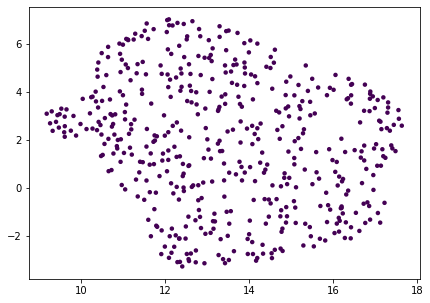

n_components = 3, n_clusters = 2


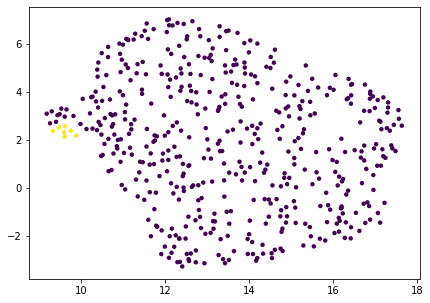

n_components = 3, n_clusters = 3


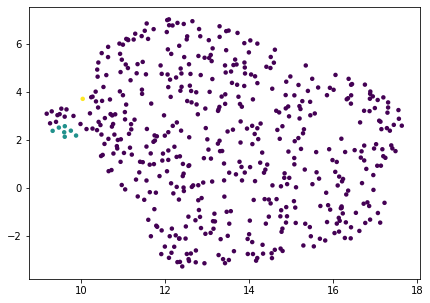

n_components = 3, n_clusters = 6


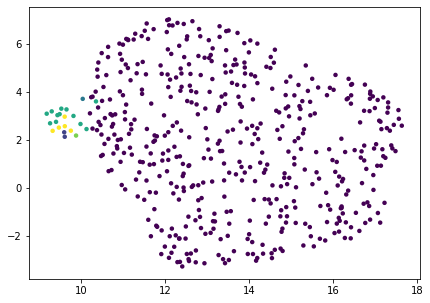

n_components = 3, n_clusters = 9


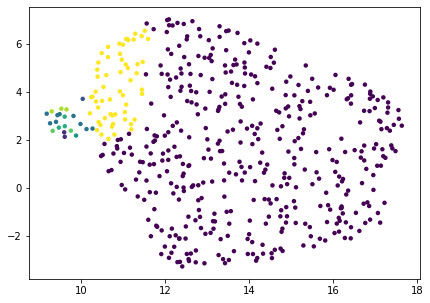

n_components = 3, n_clusters = 12


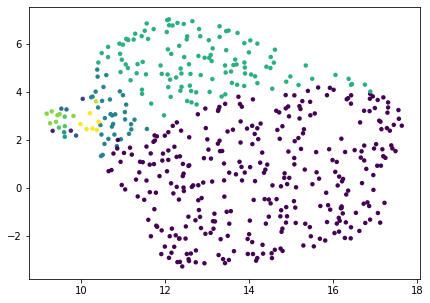

n_components = 3, n_clusters = 15


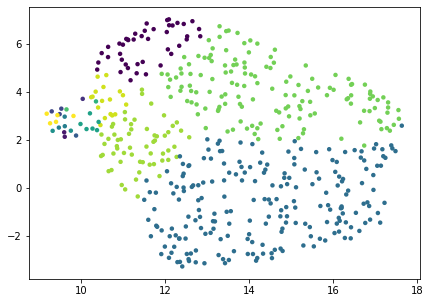

n_components = 3, n_clusters = 20


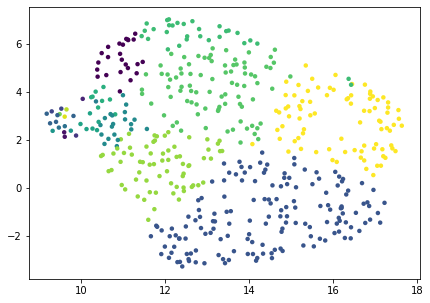

n_components = 3, n_clusters = 25


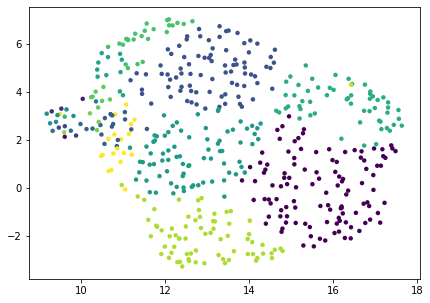

n_components = 3, n_clusters = 30


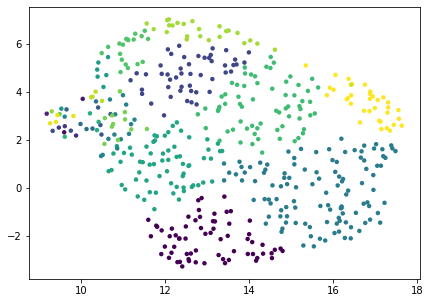

n_components = 3, n_clusters = 40


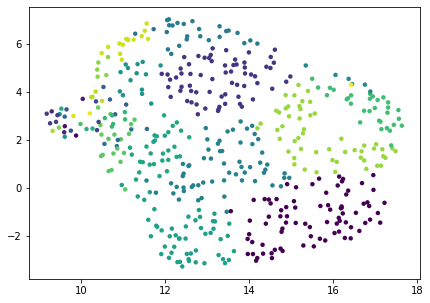

n_components = 3, n_clusters = 50


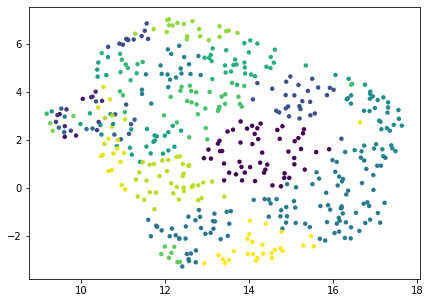

In [31]:
n_components = 3
U, Sigma, VT = randomized_svd(tfidf_matrix, n_components=n_components, n_iter=100, random_state=42)

n_clusters_list = [1, 2, 3, 6, 9, 12, 15, 20, 25, 30, 40, 50]
for c in n_clusters_list:
    print(f'n_components = {n_components}, n_clusters = {c}')
    plot_embeddings_clusters(U, Sigma, n_clusters=c)

n_components = 6, n_clusters = 1


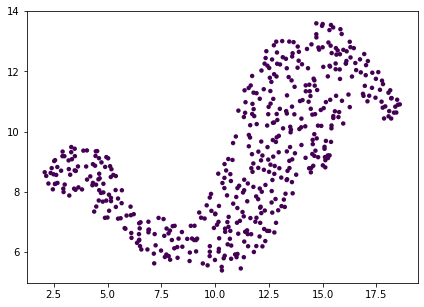

n_components = 6, n_clusters = 2


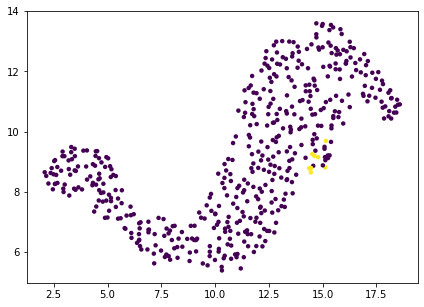

n_components = 6, n_clusters = 3


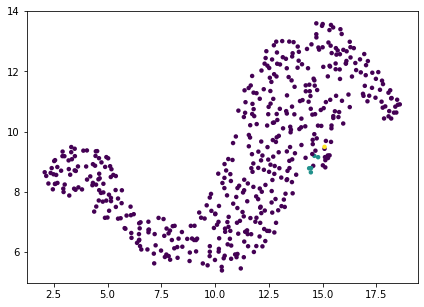

n_components = 6, n_clusters = 6


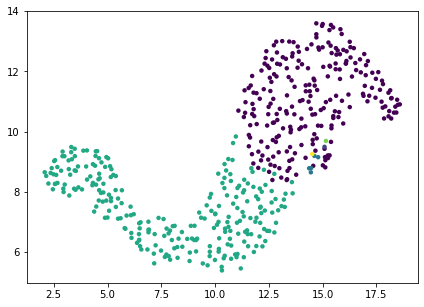

n_components = 6, n_clusters = 9


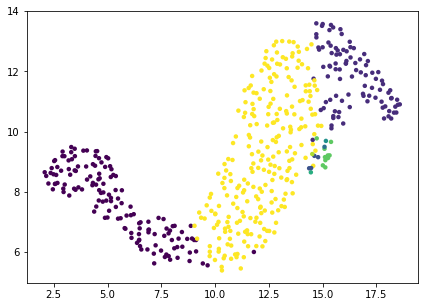

n_components = 6, n_clusters = 12


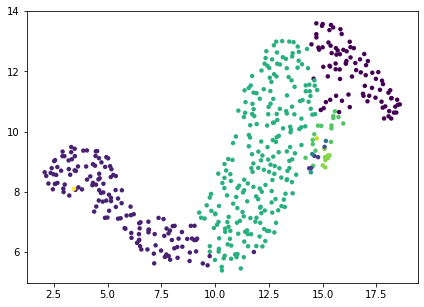

n_components = 6, n_clusters = 15


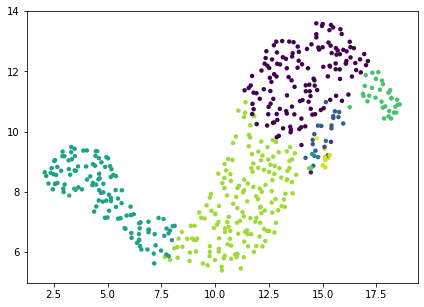

n_components = 6, n_clusters = 20


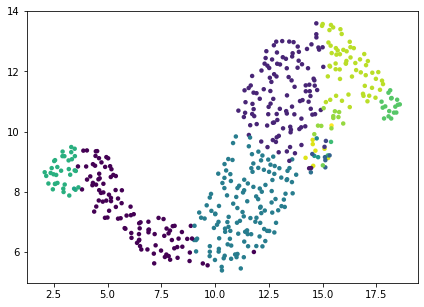

n_components = 6, n_clusters = 25


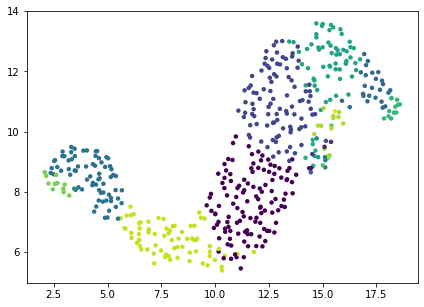

n_components = 6, n_clusters = 30


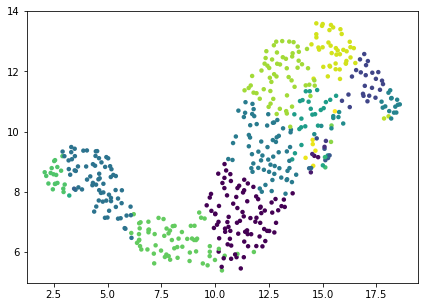

n_components = 6, n_clusters = 40


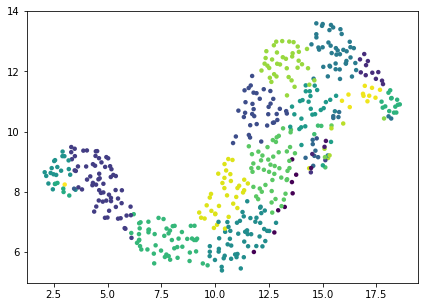

n_components = 6, n_clusters = 50


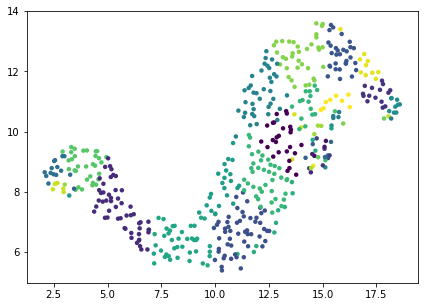

In [32]:
n_components = 6
U, Sigma, VT = randomized_svd(tfidf_matrix, n_components=n_components, n_iter=100, random_state=42)

n_clusters_list = [1, 2, 3, 6, 9, 12, 15, 20, 25, 30, 40, 50]
for c in n_clusters_list:
    print(f'n_components = {n_components}, n_clusters = {c}')
    plot_embeddings_clusters(U, Sigma, n_clusters=c)

n_components = 9, n_clusters = 1


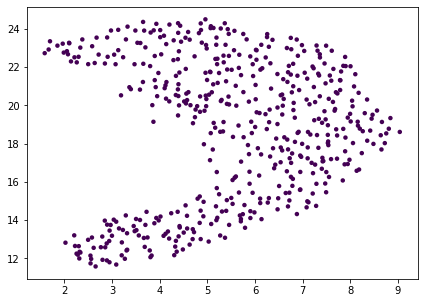

n_components = 9, n_clusters = 2


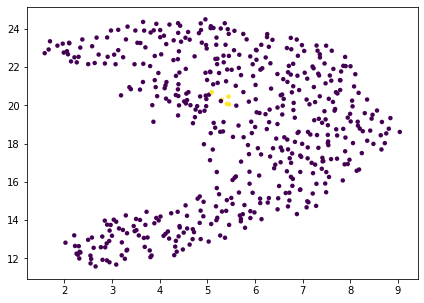

n_components = 9, n_clusters = 3


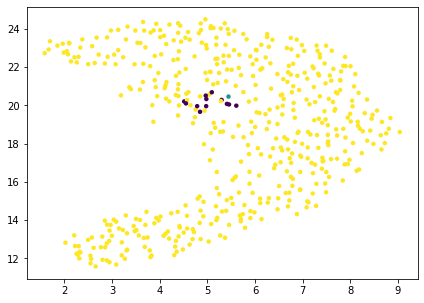

n_components = 9, n_clusters = 6


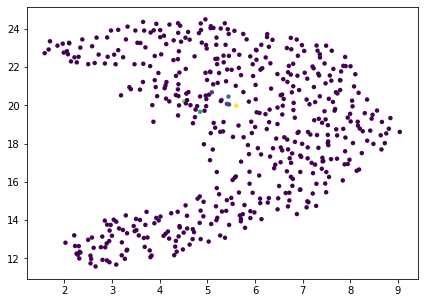

n_components = 9, n_clusters = 9


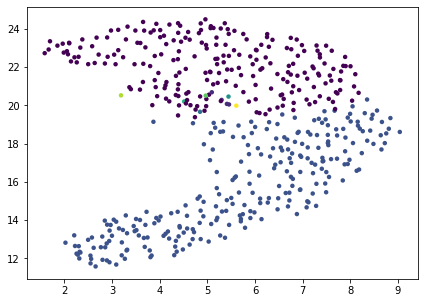

n_components = 9, n_clusters = 12


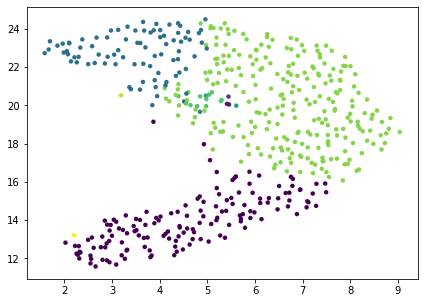

n_components = 9, n_clusters = 15


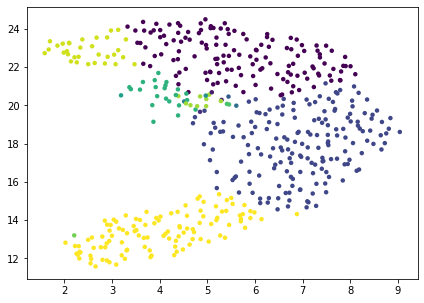

n_components = 9, n_clusters = 20


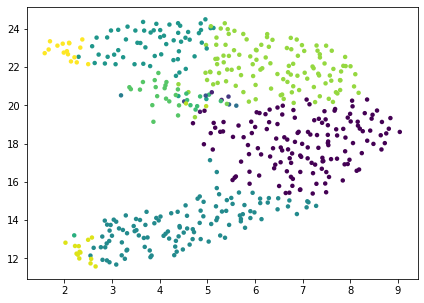

n_components = 9, n_clusters = 25


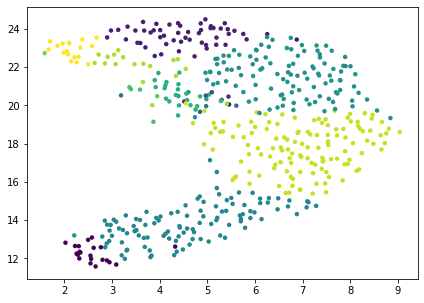

n_components = 9, n_clusters = 30


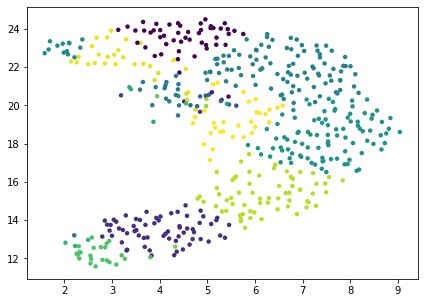

n_components = 9, n_clusters = 40


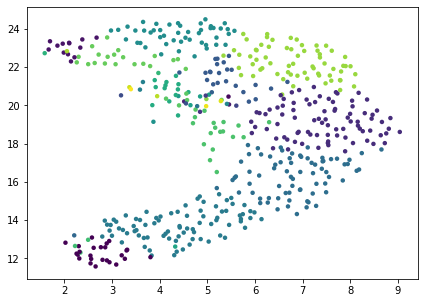

n_components = 9, n_clusters = 50


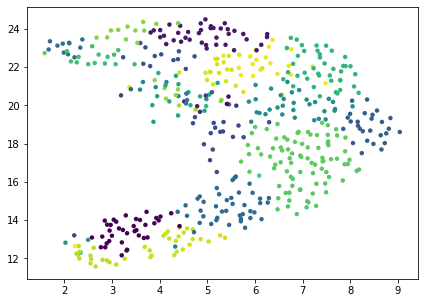

In [33]:
n_components = 9
U, Sigma, VT = randomized_svd(tfidf_matrix, n_components=n_components, n_iter=100, random_state=42)

n_clusters_list = [1, 2, 3, 6, 9, 12, 15, 20, 25, 30, 40, 50]
for c in n_clusters_list:
    print(f'n_components = {n_components}, n_clusters = {c}')
    plot_embeddings_clusters(U, Sigma, n_clusters=c)

n_components = 12, n_clusters = 1


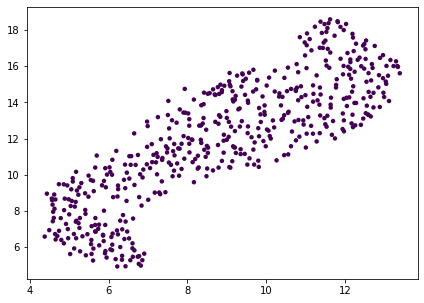

n_components = 12, n_clusters = 2


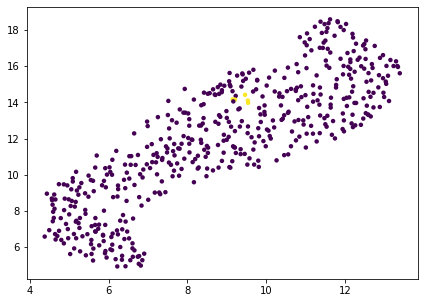

n_components = 12, n_clusters = 3


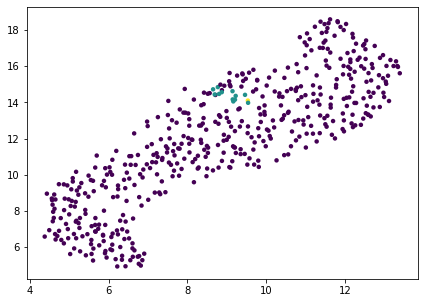

n_components = 12, n_clusters = 6


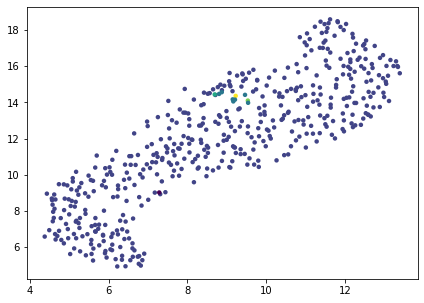

n_components = 12, n_clusters = 9


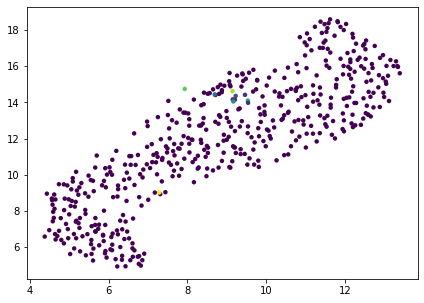

n_components = 12, n_clusters = 12


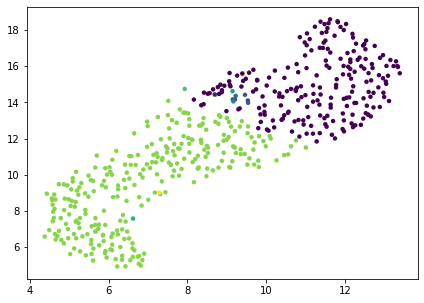

n_components = 12, n_clusters = 15


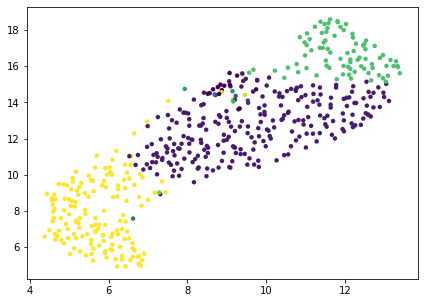

n_components = 12, n_clusters = 20


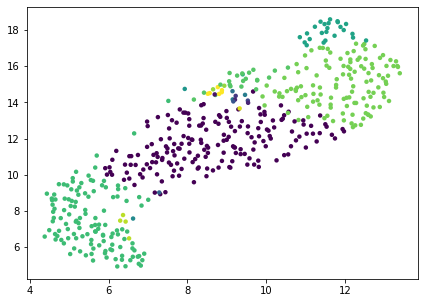

n_components = 12, n_clusters = 25


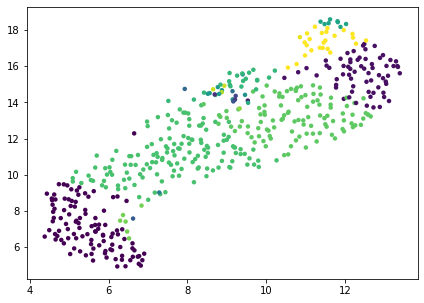

n_components = 12, n_clusters = 30


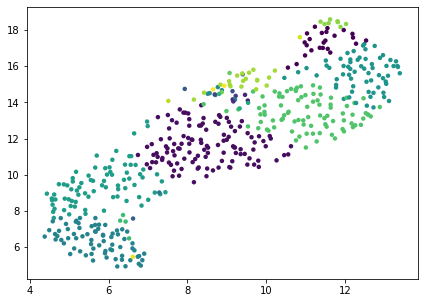

n_components = 12, n_clusters = 40


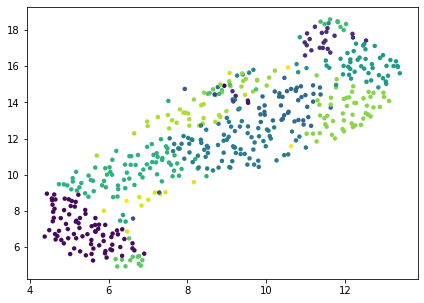

n_components = 12, n_clusters = 50


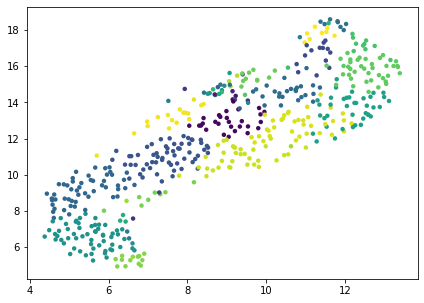

In [34]:
n_components = 12
U, Sigma, VT = randomized_svd(tfidf_matrix, n_components=n_components, n_iter=100, random_state=42)

n_clusters_list = [1, 2, 3, 6, 9, 12, 15, 20, 25, 30, 40, 50]
for c in n_clusters_list:
    print(f'n_components = {n_components}, n_clusters = {c}')
    plot_embeddings_clusters(U, Sigma, n_clusters=c)

n_components = 15, n_clusters = 1


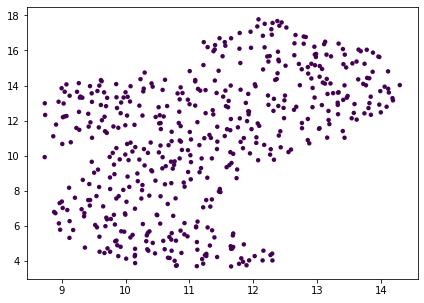

n_components = 15, n_clusters = 2


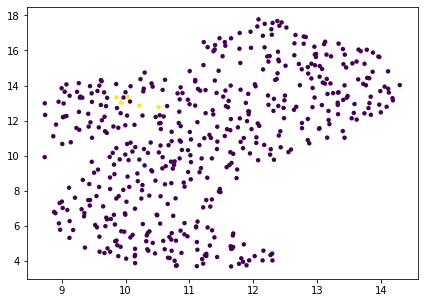

n_components = 15, n_clusters = 3


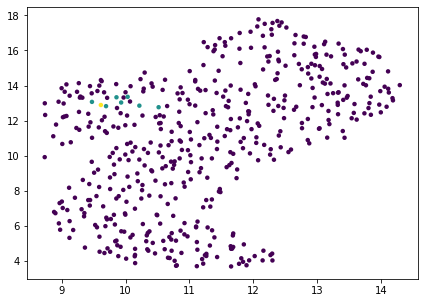

n_components = 15, n_clusters = 6


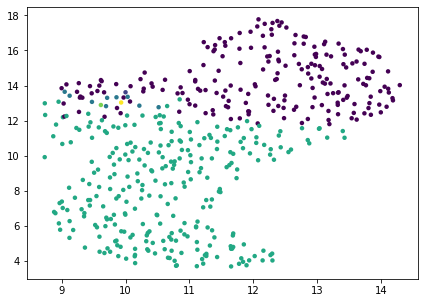

n_components = 15, n_clusters = 9


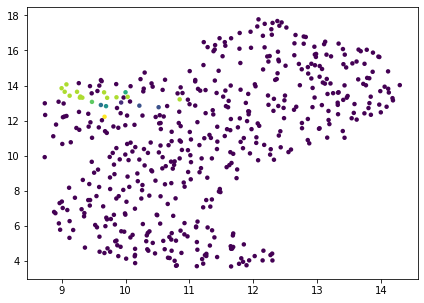

n_components = 15, n_clusters = 12


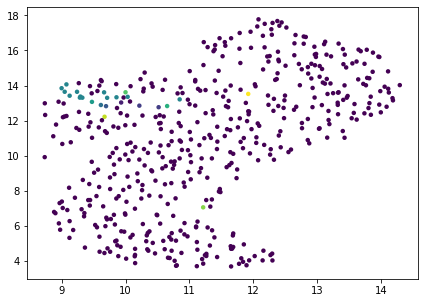

n_components = 15, n_clusters = 15


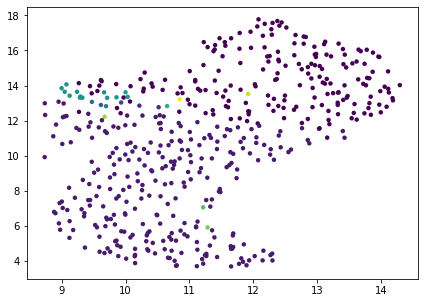

n_components = 15, n_clusters = 20


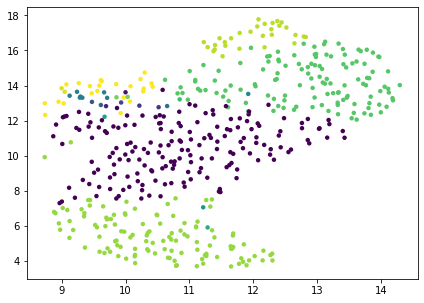

n_components = 15, n_clusters = 25


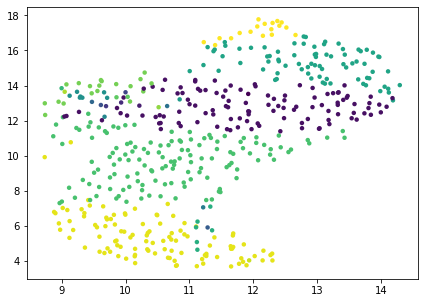

n_components = 15, n_clusters = 30


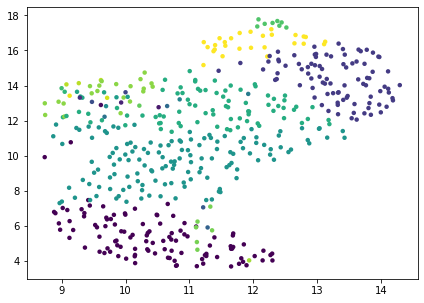

n_components = 15, n_clusters = 40


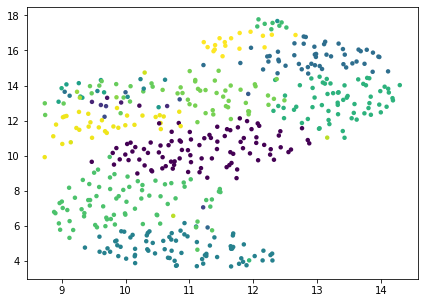

n_components = 15, n_clusters = 50


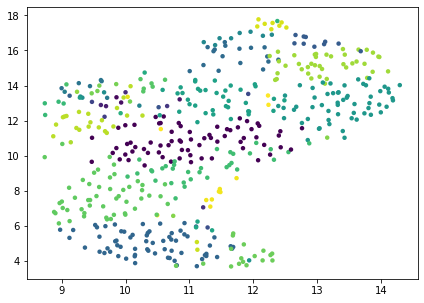

In [35]:
n_components = 15
U, Sigma, VT = randomized_svd(tfidf_matrix, n_components=n_components, n_iter=100, random_state=42)

n_clusters_list = [1, 2, 3, 6, 9, 12, 15, 20, 25, 30, 40, 50]
for c in n_clusters_list:
    print(f'n_components = {n_components}, n_clusters = {c}')
    plot_embeddings_clusters(U, Sigma, n_clusters=c)

n_components = 20, n_clusters = 1


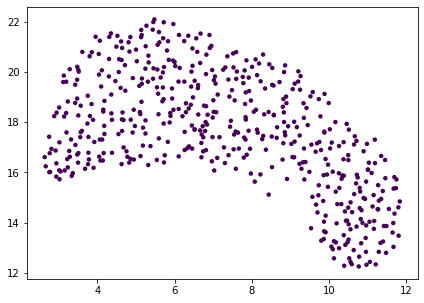

n_components = 20, n_clusters = 2


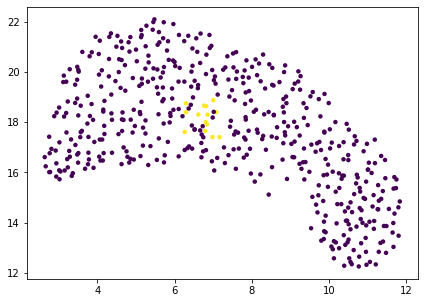

n_components = 20, n_clusters = 3


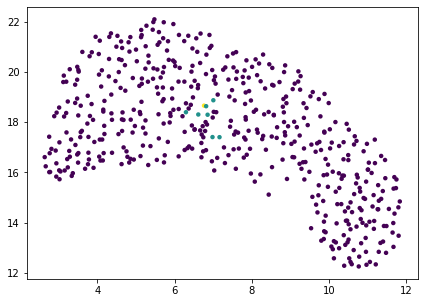

n_components = 20, n_clusters = 6


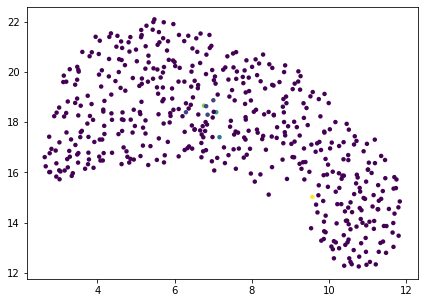

n_components = 20, n_clusters = 9


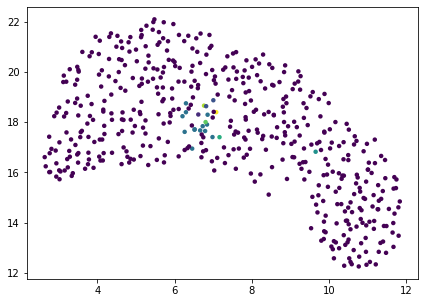

n_components = 20, n_clusters = 12


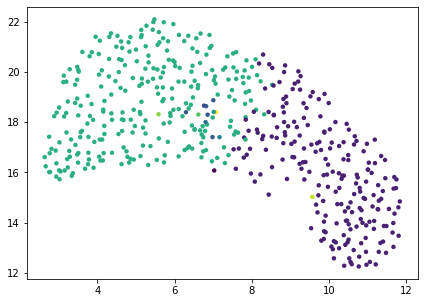

n_components = 20, n_clusters = 15


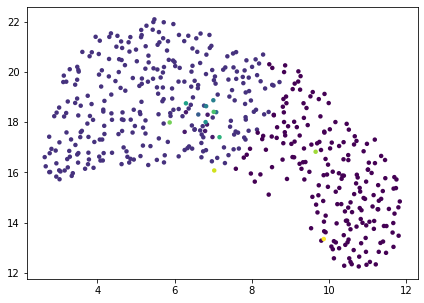

n_components = 20, n_clusters = 20


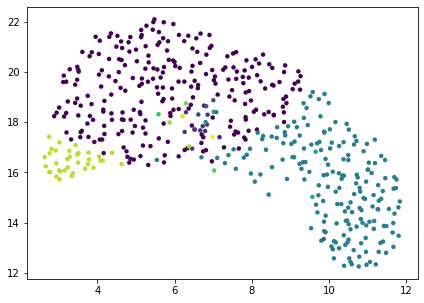

n_components = 20, n_clusters = 25


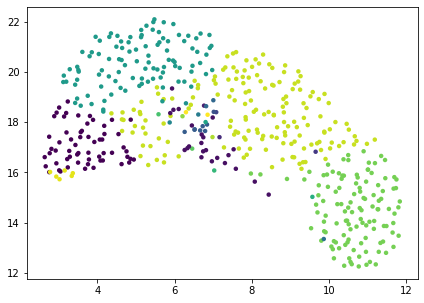

n_components = 20, n_clusters = 30


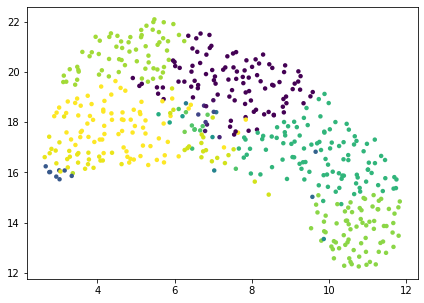

n_components = 20, n_clusters = 40


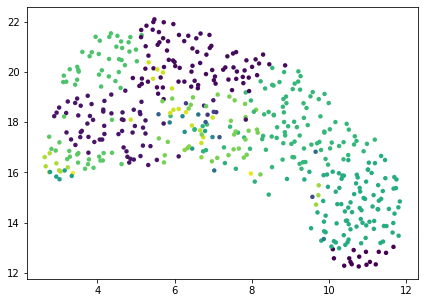

n_components = 20, n_clusters = 50


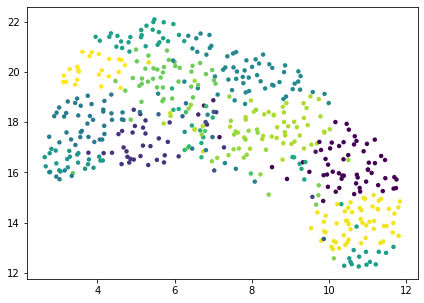

In [36]:
n_components = 20
U, Sigma, VT = randomized_svd(tfidf_matrix, n_components=n_components, n_iter=100, random_state=42)

n_clusters_list = [1, 2, 3, 6, 9, 12, 15, 20, 25, 30, 40, 50]
for c in n_clusters_list:
    print(f'n_components = {n_components}, n_clusters = {c}')
    plot_embeddings_clusters(U, Sigma, n_clusters=c)

What are the differences you observe by using a different number of `n_components` in LSA or `n_clusters` in K-Means?

`n_components` is the number of singular values and vectors to extract.  By changing `n_components`, you get a different document embedding so the points on the plot are different.  The first few components provide more information about the documents than later components.  After reaching a certain value for n_components, increasing it more will not provide much additional information.  It is difficult to see the visual difference in the 2D plots with different `n_components` values.


`n_clusters` is the number of clusters to form as well as the number of centroids to generate in K-Means.  If the `n_clusters` value is too low, most of the data points belong to one cluster (in the above graphs, this cluster is purple), with the other clusters only including a couple data points.  If the `n_clusters` value is too high, the clusters become less distinctive (different colours in the same region of the graph) and you will again have many clusters that only include a couple data points.  Ideally, "the optimal choice of k (number of clusters) will strike a balance between maximum compression of the data using a single cluster, and maximum accuracy by assigning each data point to its own cluster" (https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set).  If an optimal `n_clusters` value is chosen, the graph will show meaningful groupings with clean boundaries between each cluster.








## Problem 2.5 Latent Dirichlet Allocation

Run LDA on `documents` using `sklearn` (find the documentation at this [link](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation))

Make sure to specify `random_state=42` for replicability. 

What is the *unnormalized* topic distribution allocated to document number 13?

In [37]:
documents = cleaned_documents
print(documents[13])

['philadelphia', '23', 'nick', 'skorich', 'line', 'coach', 'football', 'champion', 'philadelphia', 'eagles', 'elevated', 'today', 'head', 'coach', 'skorich', 'received', 'contract', 'salary', 'believed', 'year', 'succeeds', 'buck', 'shaw', 'retired', 'end', 'last', 'season', 'appointment', 'announced', 'news', 'conference', 'skorich', 'said', 'would', 'retain', 'two', 'members', 'staff', 'jerry', 'williams', 'charlie', 'gauer', 'williams', 'defensive', 'coach', 'gauer', 'works', 'ends', 'choice', 'expected', 'selection', 'expected', 'skorich', 'considered', 'logical', 'choice', 'club', 'gave', 'norm', 'van', 'brocklin', 'permission', 'seek', 'head', 'coaching', 'job', 'minnesota', 'vikings', 'newest', 'national', 'football', 'league', 'entry', 'van', 'brocklin', 'quarterback', 'led', 'eagles', 'title', 'signed', 'vikings', 'last', 'wednesday', 'philadelphia', 'permitted', 'seek', 'better', 'connection', 'refused', 'reconsider', 'decision', 'end', 'career', 'player', 'skorich', 'helm', 

In [38]:
from sklearn.decomposition import LatentDirichletAllocation

In [39]:
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(tfidf_matrix)
doc_topic_distr = lda.transform(tfidf_matrix)
topic_distr_13 = list(doc_topic_distr[13])
topic_distr_13_rounded = []

for num in topic_distr_13:
    topic_distr_13_rounded.append(round(num, 8))

print(f'unnormalized topic distribution for document 13: {topic_distr_13_rounded}')

unnormalized topic distribution for document 13: [0.76560762, 0.02603949, 0.02603897, 0.02603897, 0.02603993, 0.02603723, 0.02608197, 0.02603777, 0.02604235, 0.02603569]
